## Python statistics essential training - 05_04_crossvalidation

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Loading gapminder data for year 1985 (Live Aid!).

In [7]:
gapminder = pd.read_csv('gapminder.csv')

In [8]:
gdata = gapminder.query('year == 1985')

Refactored plotting so that it works on arbitrary datasets.

In [9]:
def sc(data):
    return 1e-6 * data.population, data.region.map({'Africa': 'skyblue', 'Europe': 'gold',
                                                   'America': 'palegreen', 'Asia': 'coral'})

def plotdata(data=gdata):
    size, colors = sc(data)
    data.plot.scatter('age5_surviving','babies_per_woman',
                      c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)
                      
def plotfit(fit,data=gdata):
    plotdata(data)

    size, colors = sc(data)
    pp.scatter(data.age5_surviving,fit.predict(data),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

Model formulas from the last two videos

In [10]:
f_groupmeans = 'babies_per_woman ~ -1 + region'
f_surviving = 'babies_per_woman ~ -1 + region + age5_surviving'
f_srp = ('babies_per_woman ~ -1 + region + age5_surviving'
         '+ age5_surviving:region - age5_surviving + population')

In [ ]:
# Cross validation is used in machine learning
# will divide into training data and testing data,
# training data will feed the model
# testing set will evaluate model prediction error


In [40]:
# "shuffle" data using Pandas dataframe model, 
shuffled = gdata.sample(len(gdata))

In [41]:
# pandas iloc method selecting every other row
training, testing = shuffled.iloc[:len(gdata)//2], shuffled.iloc[len(gdata)//2:]

In [42]:
surviving = smf.ols(f_surviving, data=training).fit()

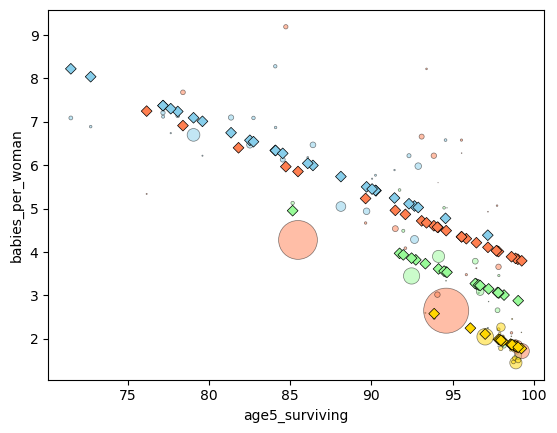

In [43]:
plotfit(surviving, training)

In [44]:
surviving.mse_resid

1.2327442780322282

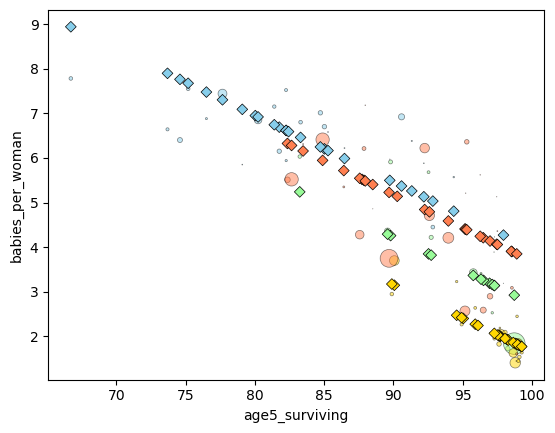

In [45]:
plotfit(surviving, testing)

In [46]:
# to compute the MSE, first get residuals
resid = surviving.predict(testing) - testing.babies_per_woman
#testing.babies_per_woman is the observed data
df = len(testing) - surviving.df_model - 1
np.sum(resid*2) / df
# dividing by degress of freedom

-0.004090916517972921

In [47]:
def cross_validate(data, formula, response, n=100):
    ret = []
    
    for i in range(n):
        shuffled = data.sample(len(data))
        
        training, testing = shuffled.iloc[:len(data)//2], shuffled.iloc[len(data)//2:]
        
        trained = smf.ols(f_surviving, data=training).fit()
        
        resid = trained.predict(testing) - testing[response]
        df = len(testing) - trained.df_model - 1
        mse = np.sum(resid*2) / df
        
        ret.append(mse)
        
    return np.mean(ret)
        

In [48]:
cross_validate(gdata, f_groupmeans, 'babies_per_woman')

0.015042670006450716

In [49]:
cross_validate(gdata, f_surviving, 'babies_per_woman')

0.01108282200333285

In [50]:
cross_validate(gdata, f_srp, 'babies_per_woman')

0.013131824330837736

In [ ]:
# lowest value is the "surviving" model 
# K-fold cross validation in real world use, 
# is folding into k subsets and then k sucessive trials, one subset held for testing and trains on the rest
# Sci-kit learn supports k-fold